run this

In [226]:
%load_ext autoreload
%autoreload 2
# Enable imports form top-level of project (edit top_level_path accordingly)
import os
import sys
import inspect

top_level_path = os.path.abspath(os.path.join('..'))
if top_level_path not in sys.path:
	sys.path.append(top_level_path)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from longestpath.gen import gen_num_edges, gen_num_edges_undirected, gen_planted_hamiltonian_undirected_fixed_degree
from benchmarking import RandomParams, Benchmark, new_random_benchmark, Solver, new_graph_file_benchmark, new_benchmark
import matplotlib.colors as mcolors
import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [297]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
all_methods = ["brute('BRANCH_N_BOUND')",
 "brute('BRUTE_FORCE')",
 "brute('BRUTE_FORCE_COMPLETE')",
 "brute('FAST_BOUND')",
 'ilp()',
 'kalp()',
 'kalp(threads=4)']

color_assignment = {method : col for method, col in zip(all_methods, colors)}
color_assignment

{"brute('BRANCH_N_BOUND')": '#1f77b4',
 "brute('BRUTE_FORCE')": '#ff7f0e',
 "brute('BRUTE_FORCE_COMPLETE')": '#2ca02c',
 "brute('FAST_BOUND')": '#d62728',
 'ilp()': '#9467bd',
 'kalp()': '#8c564b',
 'kalp(threads=4)': '#e377c2'}

In [3]:
def generate():
  return [
    gen_planted_hamiltonian_undirected_fixed_degree(30, round(30 * deg / 2))
    for deg in np.linspace(1.0, 10.0, 10) for _ in range(50)
  ]

params_code = inspect.getsource(generate)
graphs = generate()

benchmark = new_benchmark(graphs, solvers=[
	Solver("brute", "FAST_BOUND"),
	Solver("brute", "BRUTE_FORCE"),
	Solver("brute", "BRANCH_N_BOUND"),
	# Solver("brute", "BRUTE_FORCE_COMPLETE"),
	Solver("ilp"),
	Solver("kalp", threads=4),
	# Solver("kalp"),
], params_code = params_code, override_benchmark_path="../final_benchmarks/only_ham_3brute_ilp_kalp_deg1-10_50runs")

benchmark.benchmark_path


'../final_benchmarks/only_ham_3brute_ilp_kalp_deg1-10_50runs'

In [158]:
np.linspace(10, 30, 10)

array([10.        , 12.22222222, 14.44444444, 16.66666667, 18.88888889,
       21.11111111, 23.33333333, 25.55555556, 27.77777778, 30.        ])

run this

In [3]:
benchmark = Benchmark.load("../final_benchmarks/only_ham_3brute_ilp_kalp_deg1-10_50runs/")

In [4]:
benchmark.run(retryFailures=True, timeout=3 * 60)


graph: 0.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.1e-05
graph: 1.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 2e-05
graph: 2.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.3e-05
graph: 3.txt, solver: brute('FAST_BOUND') ... 

✅
length: 29, run_time: 1.2e-05
graph: 4.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.2e-05
graph: 5.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.2e-05
graph: 6.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.2e-05
graph: 7.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.3e-05
graph: 8.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.1e-05
graph: 9.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.2e-05
graph: 10.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.1e-05
graph: 11.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 2.8e-05
graph: 12.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.3e-05
graph: 13.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.2e-05
graph: 14.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.2e-05
graph: 15.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.2e-05
graph: 16.txt, solver: bru

run everything after this

In [4]:
df_ = benchmark.get_dataframe()
if not "failure" in df_:
    df_["failure"] = None
df = df_
df.head()

,path,run_time,length,solver,graph_id,status,objective_value,failure,solver_name,vertices,edges,average_out_degree
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000011,29.0,0,0,NaN,NaN,NaN,brute('FAST_BOUND'),30,58,1.933333
1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000020,29.0,0,1,NaN,NaN,NaN,brute('FAST_BOUND'),30,58,1.933333
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000013,29.0,0,2,NaN,NaN,NaN,brute('FAST_BOUND'),30,58,1.933333
3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000012,29.0,0,3,NaN,NaN,NaN,brute('FAST_BOUND'),30,58,1.933333
4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000012,29.0,0,4,NaN,NaN,NaN,brute('FAST_BOUND'),30,58,1.933333


In [5]:
df[(df["solver_name"] == "ilp()") & (df["length"] != 29)]

,path,run_time,length,solver,graph_id,status,objective_value,failure,solver_name,vertices,edges,average_out_degree


run_time    Axes(0.125,0.11;0.775x0.77)
dtype: object

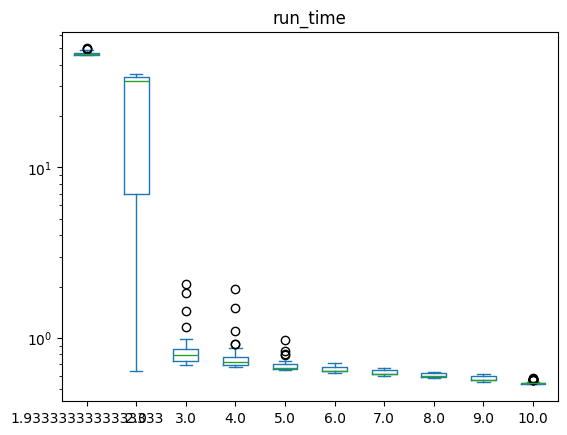

In [6]:
df[df["solver_name"] == "ilp()"][["run_time", "average_out_degree"]].plot.box(by="average_out_degree", logy=True)


In [155]:
df_grouped = df \
  .groupby(['average_out_degree', 'solver', 'solver_name']) \
  .agg({
    "run_time": ["mean", "median", "std"], 
    "failure": "any"
  }) \
  .reset_index() \
  .rename(columns={"any": ""})

df_grouped.columns = [a + ("_" + b if b != "" else "")  for (a,b) in df_grouped.columns]

df_grouped_failures_removed = df_grouped[df_grouped["failure"] == False]
to_plot = df_grouped_failures_removed.pivot(
  index='average_out_degree', 
  columns='solver_name', 
  values=['run_time_mean', 'run_time_std']
)


In [156]:
df_grouped_failures_removed.groupby(["solver_name"]).agg({"failure": "count"}).reset_index().rename(columns={"failure": "count"})

,solver_name,count
0,brute('BRANCH_N_BOUND'),10
1,brute('BRUTE_FORCE'),10
2,brute('FAST_BOUND'),10
3,ilp(),10
4,kalp(threads=4),4


In [157]:
df_grouped_failures_removed.head()

,average_out_degree,solver,solver_name,run_time_mean,run_time_median,run_time_std,failure
0,1.933333,0,brute('FAST_BOUND'),0.000013,0.000013,3.077834e-06,False
1,1.933333,1,brute('BRUTE_FORCE'),0.000002,0.000002,3.958973e-07,False
2,1.933333,2,brute('BRANCH_N_BOUND'),0.000004,0.000004,1.397374e-06,False
3,1.933333,3,ilp(),46.831174,46.170734,1.126196e+00,False
4,1.933333,4,kalp(threads=4),1.925778,1.925459,6.215199e-02,False


In [158]:
to_plot


run_time_mean                       \
solver_name        brute('BRANCH_N_BOUND') brute('BRUTE_FORCE')   
average_out_degree                                                
1.933333                          0.000004             0.000002   
2.000000                          0.000007             0.000003   
3.000000                          0.000838             0.000547   
4.000000                          0.011184             0.034607   
5.000000                          0.010062             0.083281   
6.000000                          0.040832             0.166812   
7.000000                          0.007485             0.035776   
8.000000                          0.000115             0.490761   
9.000000                          0.000087             0.000141   
10.000000                         0.000022             0.000048   

                                                                   \
solver_name        brute('FAST_BOUND')      ilp() kalp(threads=4)   
average_out_degree                                                  
1.933333                      0.000013  46.831174        1.925778   
2.000000                      0.000015  22.522745        1.984495   
3.000000                      0.005441   0.853429        0.457396   
4.000000                      0.589332   0.783782        4.969584   
5.000000                      1.728413   0.687463             NaN   
6.000000                      0.025436   0.653658             NaN   
7.000000                      0.084233   0.625508             NaN   
8.000000                      0.000492   0.604577             NaN   
9.000000                      0.000066   0.575070             NaN   
10.000000                     0.000031   0.545543             NaN   

                              run_time_std                       \
solver_name        brute('BRANCH_N_BOUND') brute('BRUTE_FORCE')   
average_out_degree                                                
1.933333                          0.000001         3.958973e-07   
2.000000                          0.000002         2.618693e-06   
3.000000                          0.000747         5.053869e-04   
4.000000                          0.033826         1.011500e-01   
5.000000                          0.033551         3.554332e-01   
6.000000                          0.284593         1.164126e+00   
7.000000                          0.037204         1.483425e-01   
8.000000                          0.000174         3.466863e+00   
9.000000                          0.000291         5.154782e-04   
10.000000                         0.000045         2.257190e-04   

                                                                   
solver_name        brute('FAST_BOUND')      ilp() kalp(threads=4)  
average_out_degree                                                 
1.933333                      0.000003   1.126196        0.062152  
2.000000                      0.000005  14.043347        0.475445  
3.000000                      0.014219   0.261148        0.992908  
4.000000                      3.861899   0.211930       14.008459  
5.000000                     11.961825   0.056014             NaN  
6.000000                      0.101154   0.021568             NaN  
7.000000                      0.361547   0.017987             NaN  
8.000000                      0.002075   0.017656             NaN  
9.000000                      0.000254   0.016829             NaN  
10.000000                     0.000123   0.013173             NaN

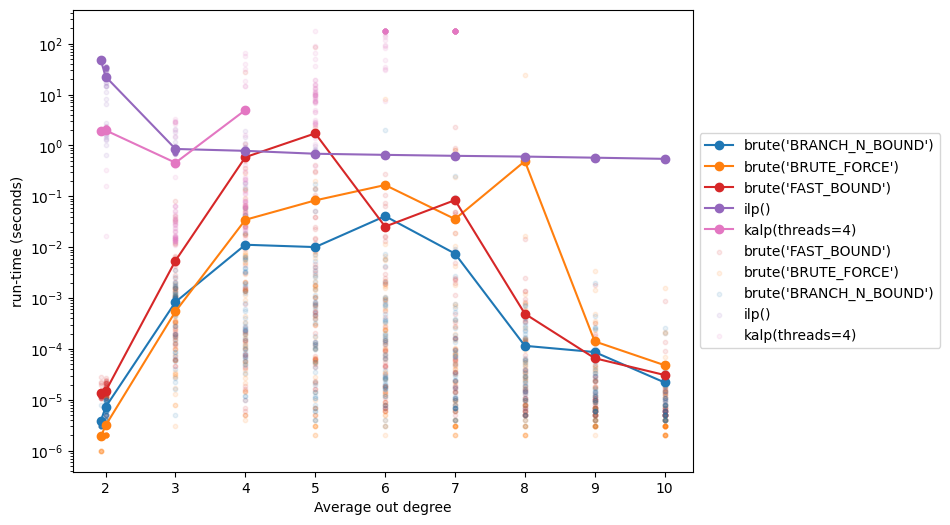

In [296]:
view = df[['average_out_degree', 'solver_name','length', 'run_time']]

# to_plot = df.groupby(['average_out_degree', 'solver', 'solver_name']).agg({'run_time': 'mean'}).reset_index() \
#     .pivot(index='average_out_degree', columns='solver_name', values='run_time') \
#     .rename(columns=lambda x: x + " (average)");

to_plot.plot(style="o-",y="run_time_mean", color=color_assignment)

for solver_name in benchmark.solver_names():
    solver_df = df[df["solver_name"] == solver_name]  # Select rows where run-time is not null
    plt.scatter(
        solver_df['average_out_degree'], 
        solver_df['run_time'], 
        label=solver_name, 
        alpha=0.1, 
        s=10,
        color=color_assignment[solver_name]
    )

plt.yscale('log')
# plt.xticks(np.arange(1, 4.0, 0.5))
plt.ylabel("run-time (seconds)")
plt.xlabel("Average out degree")
# plt.title("Longest path solve-time for random directed graphs with 50 vertices")
# plt.axhline(y=0.015, color='black', linestyle='--', label='run-time cutoff', linewidth=1, alpha=0.5, zorder=0)
# methods = list(to_plot.columns.droplevel())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# df[df["solver"] == 0].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")
# df[df["solver"] == 1].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")
# plt.ylim(0, to_plot.max().max())
# plt.ylim(0, 0.001)

plt.gcf().set_size_inches(8, 6)
plt.savefig(os.path.join(benchmark.benchmark_path, "plot.png"), dpi=400, bbox_inches='tight')

In [271]:
list(to_plot.columns.droplevel())[0:5]

["brute('BRANCH_N_BOUND')",
 "brute('BRUTE_FORCE')",
 "brute('FAST_BOUND')",
 'ilp()',
 'kalp(threads=4)']

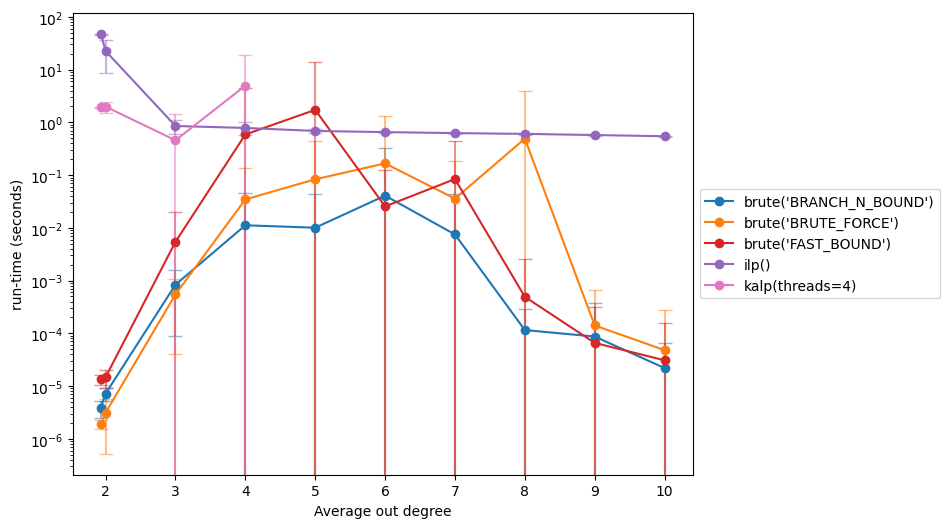

In [285]:
fig, ax = plt.subplots()

to_plot.plot(
  fmt=".", 
  y="run_time_mean", 
  yerr="run_time_std", 
  capsize=5,
  ax=ax,
  alpha=0.5,
  color=color_assignment,
  legend=False,
  # linewidth=3
)
to_plot.plot(
  style="o-", 
  y="run_time_mean", 
  color=color_assignment,
  ax=ax,
)

plt.yscale('log')
plt.ylabel("run-time (seconds)")
plt.xlabel("Average out degree")
methods = list(to_plot.columns.droplevel())
plt.legend(methods[0:len(methods)//2], loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylim(-1,5)

plt.gcf().set_size_inches(8, 6)